In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import re

bow = {}

bowb = {}
bowm = {}

f = open("../datasets/_chat.txt")
next(f)
for line in f.readlines():
    
    name = re.match("^\[.+\] Jan: ", line)

    tokens = re.sub("\[.+\] .+: ", "", line)
    tokens = re.sub('("|\')', '', tokens)
    tokens = re.sub('[^A-Za-z]', ' ', tokens).strip().lower().split()
    for tok in tokens:
        if len(tok) < 5: continue
        if name:
            bowb.setdefault(tok, 0)
            bowb[tok] += 1
        else:
            bowm.setdefault(tok, 0)
            bowm[tok] += 1

        bow.setdefault(tok, 0)
        bow[tok] += 1

In [63]:
bowb['mupke'], bowm['mupke'] 

(365, 157)

In [23]:
sorted(bow.items(), key=lambda x: x[1], reverse=True)[:40]

[('weggelaten', 2094),
 ('beetje', 1308),
 ('gewoon', 1216),
 ('morgen', 1213),
 ('afbeelding', 1050),
 ('trouwens', 1012),
 ('alleen', 944),
 ('sticker', 815),
 ('heeft', 813),
 ('hahaha', 806),
 ('helemaal', 753),
 ('hebben', 745),
 ('anders', 736),
 ('kunnen', 735),
 ('eigenlijk', 678),
 ('kijken', 666),
 ('komen', 633),
 ('vandaag', 631),
 ('thuis', 624),
 ('altijd', 617),
 ('wordt', 604),
 ('sorry', 598),
 ('omdat', 593),
 ('prima', 588),
 ('inderdaad', 570),
 ('alles', 559),
 ('trainen', 546),
 ('https', 534),
 ('misschien', 525),
 ('maken', 524),
 ('mupke', 522),
 ('dankjewel', 500),
 ('dingen', 499),
 ('lekker', 496),
 ('slapen', 490),
 ('weten', 471),
 ('zeker', 465),
 ('allemaal', 463),
 ('precies', 442),
 ('beter', 422)]

In [18]:
bow["bazinga"]

44

In [57]:
"".join(['a', 'b'])

'ab'

In [58]:
from wordcloud import WordCloud

f = open("../datasets/_chat.txt")
next(f)
data = ""
for line in f.readlines():
    tokens = re.sub("\[.+\] .+: ", "", line)
    tokens = re.sub('("|\')', '', tokens)
    tokens = ' '.join([token for token in tokens.split() if len(token) >= 5])
    data += re.sub('[^A-Za-z]', ' ', tokens).strip().lower()


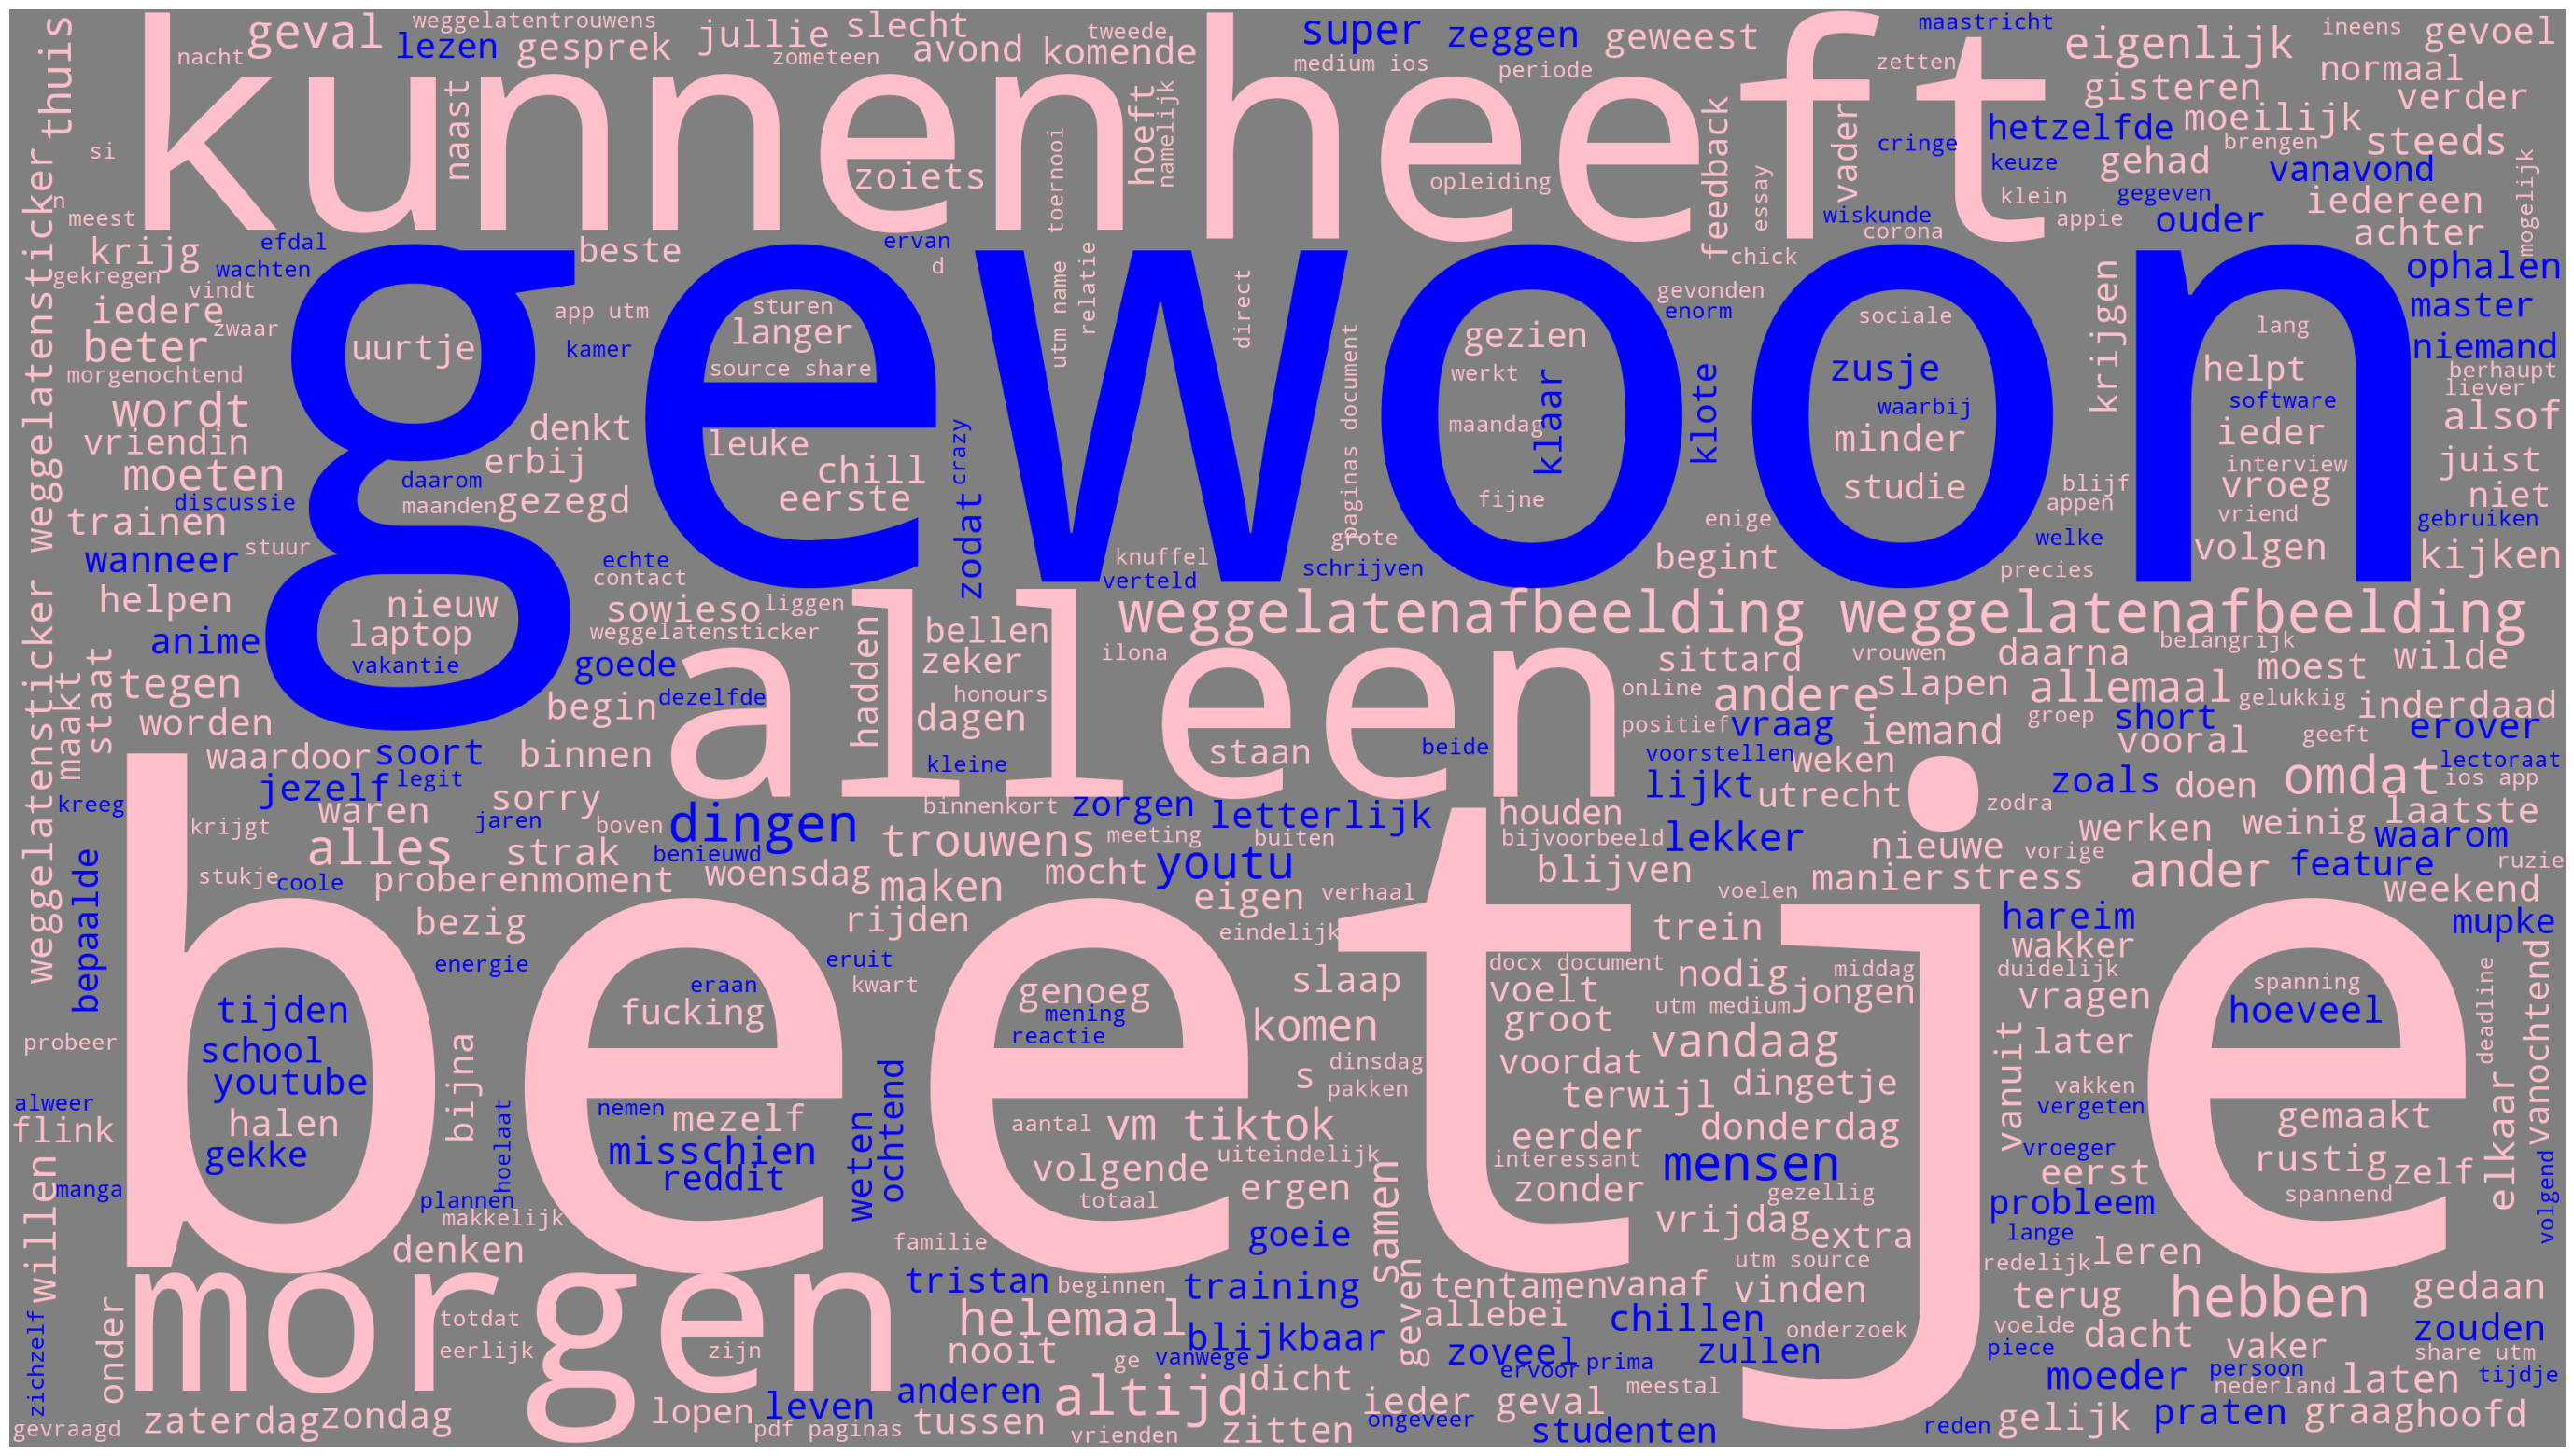

In [67]:

def get_color(word, *args, **kwargs):
    if word in bowb and word in bowm:
        return "blue" if bowb.get(word) >= bowm[word] else "pink"
    elif word not in bowb:
        return "pink"
    else:
        return "blue"


wc = WordCloud(width=1600, height=900, max_words=400, scale=2, background_color="gray", color_func=get_color).generate(data)

plt.figure(figsize = (40,20))
plt.axis("off")
plt.imshow(wc)
